# Importing Libraries

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy

# Blending images of the same size

In [2]:
#Blending images
img_1 = cv2.imread('Images/1.jpg')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_2 = cv2.imread('Images/2.jpg')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)
large_img = img_1
small_img = img_2


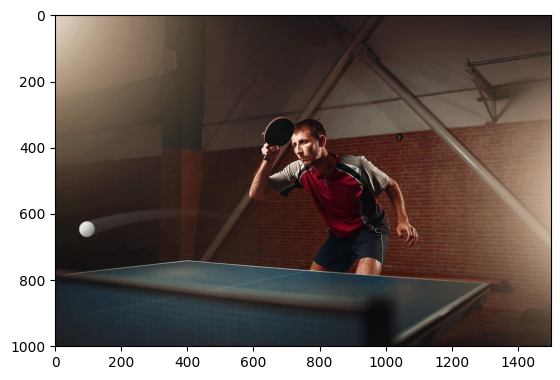

In [3]:
plt.imshow(img_1)

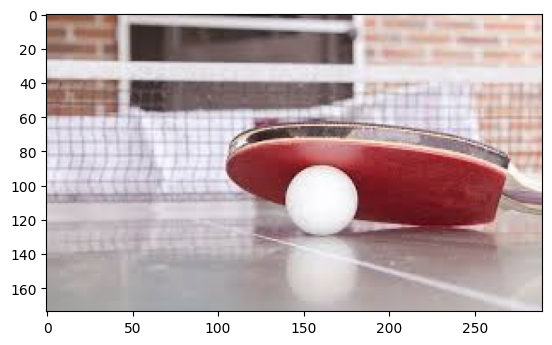

In [4]:
plt.imshow(img_2)

(1001, 1500, 3)
(174, 290, 3)


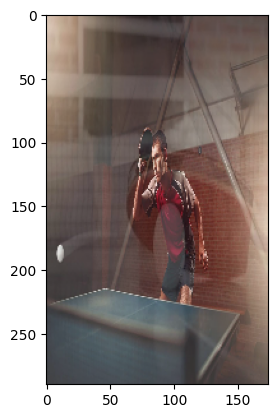

In [5]:
#Resizing both images to be the same size
print(img_1.shape)
print(img_2.shape)

img_1 = cv2.resize(img_1, (174, 290))
img_2 = cv2.resize(img_2, (174, 290))


blended = cv2.addWeighted(src1=img_1, alpha=0.8, src2=img_2, beta=0.2, gamma=10)
plt.imshow(blended)

# Overlaying

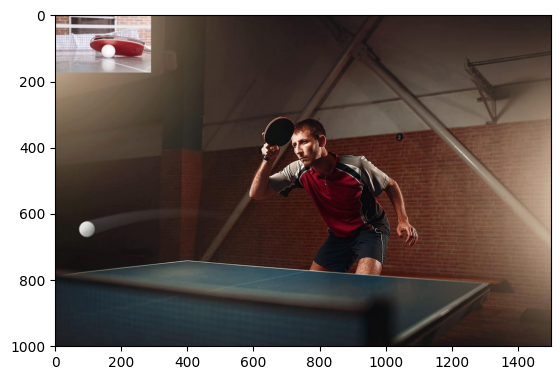

In [6]:
#Overlay images of different sizes - NO BLENDING 
#Numpy reassignment
x_offset = 0
y_offset = 0
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]
large_img[y_offset:y_end, x_offset:x_end] = small_img
plt.imshow(large_img)

# Blending and Overlaying

In [7]:
#Masking
img_1 = cv2.imread('Images/1.jpg')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
img_3 = cv2.imread('Images/3.jpg')
img_3 = cv2.cvtColor(img_3, cv2.COLOR_BGR2RGB)

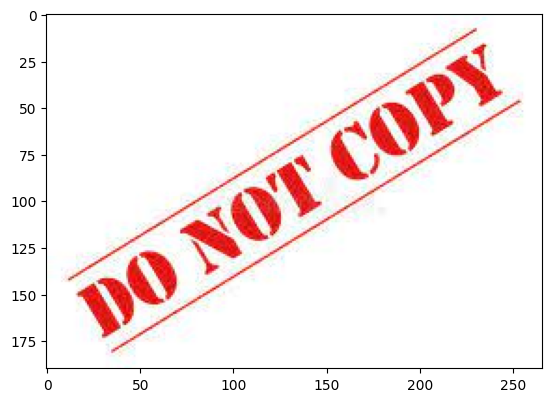

In [8]:
plt.imshow(img_3)

In [9]:
img_3.shape

(190, 266, 3)

In [10]:
img_1.shape

(1001, 1500, 3)

In [11]:
x_offset =  img_1.shape[1] - img_3.shape[1]
y_offset =  img_1.shape[0] - img_3.shape[0]
rows, columns, channels = img_3.shape
roi = img_1[y_offset:img_1.shape[0], x_offset:img_1.shape[1]]
print(roi.shape)

(190, 266, 3)


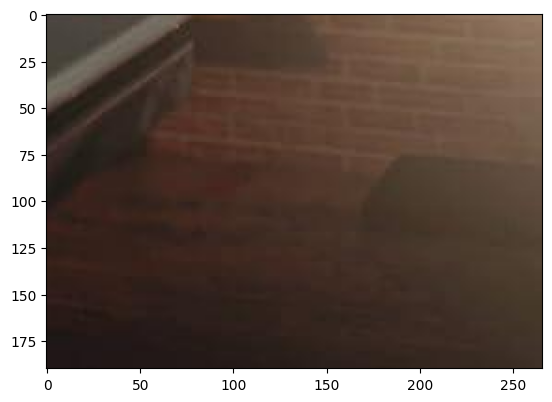

In [12]:
plt.imshow(roi)

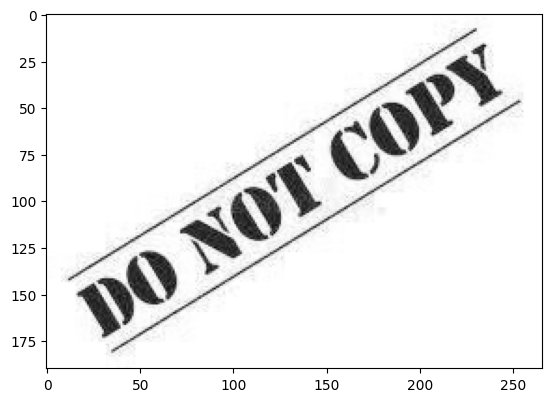

In [13]:
img_3Gray = cv2.cvtColor(img_3, cv2.COLOR_RGB2GRAY)
plt.imshow(img_3Gray, cmap='gray')

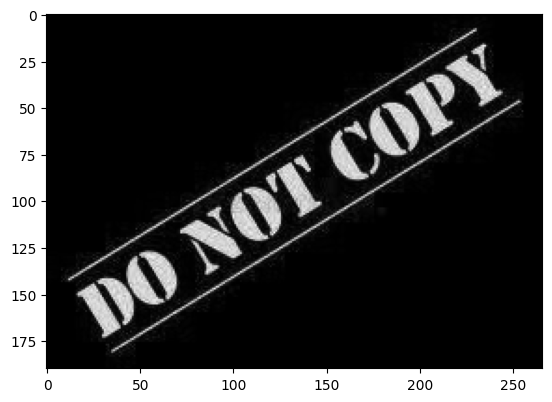

In [14]:
mask_inv = cv2.bitwise_not(img_3Gray)
plt.imshow(mask_inv, cmap='gray')

In [15]:
white_background = numpy.full(img_3.shape, 255, dtype=numpy.uint8)

In [16]:
bk = cv2.bitwise_or(white_background, white_background, mask=mask_inv)
fg = cv2.bitwise_or(img_3, img_3, mask=mask_inv)

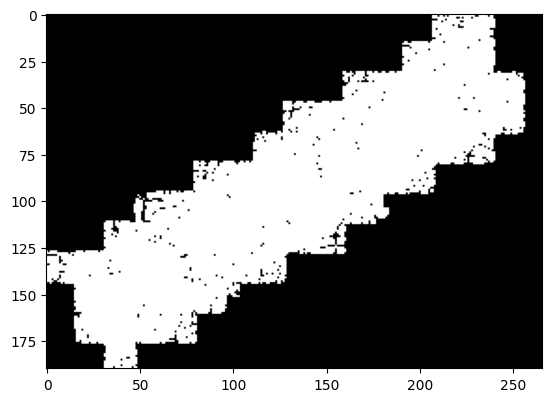

In [17]:
plt.imshow(bk)

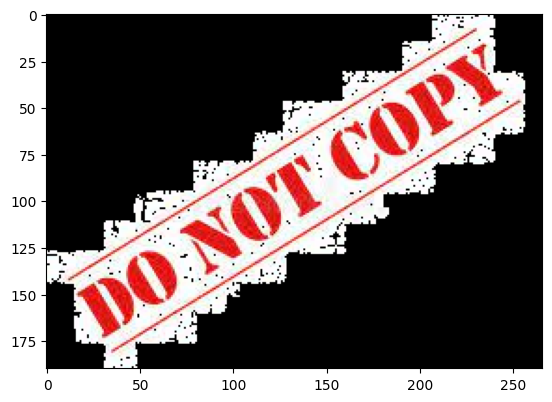

In [18]:
plt.imshow(fg)

In [19]:
final_roi = cv2.bitwise_or(roi, fg)

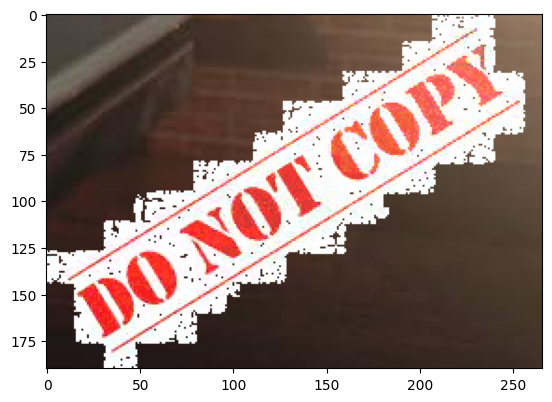

In [20]:
plt.imshow(final_roi)

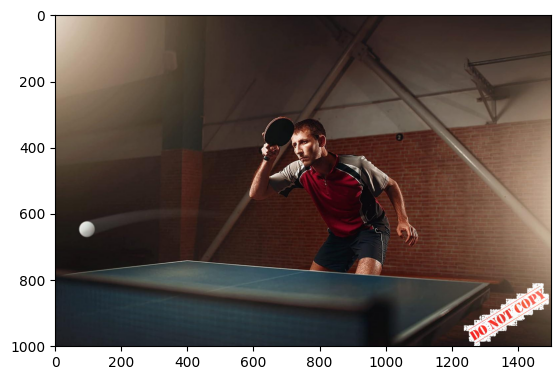

In [21]:
large_img = img_1
small_img = final_roi
large_img[y_offset:y_offset+small_img.shape[0], x_offset:x_offset+small_img.shape[1]] = small_img
plt.imshow(large_img)

# Image Thresholding

Thresholding is the method of segmenting an image into different parts. Thresholding will convert an image to consist fo only two values, white or black.

In [22]:
#Reading it as a greyscale image
img = cv2.imread('Images/rainbow.jpg', 0)

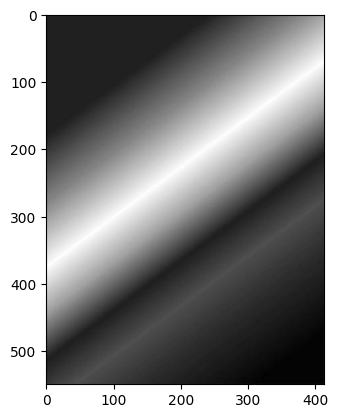

In [23]:
plt.imshow(img, cmap='gray')

In [24]:
ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)

In [25]:
ret

127.0

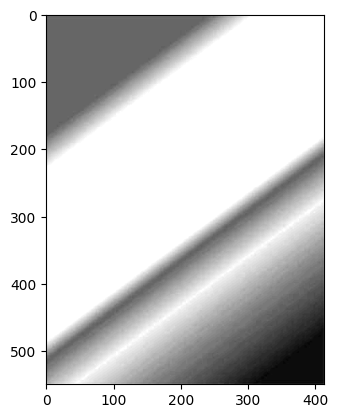

In [26]:
plt.imshow(thresh1, cmap = 'gray')

In [27]:
img = cv2.imread('Images/crossword.jpg', 0)

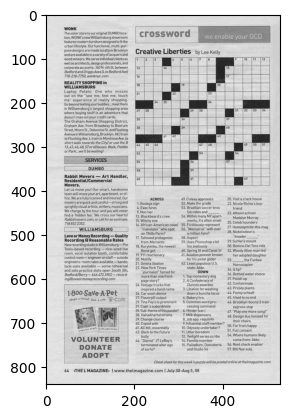

In [28]:
plt.imshow(img, cmap = 'gray')

In [29]:
def show_pic(img):
    fig = plt.figure(figsize=(15,15))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap = 'gray')

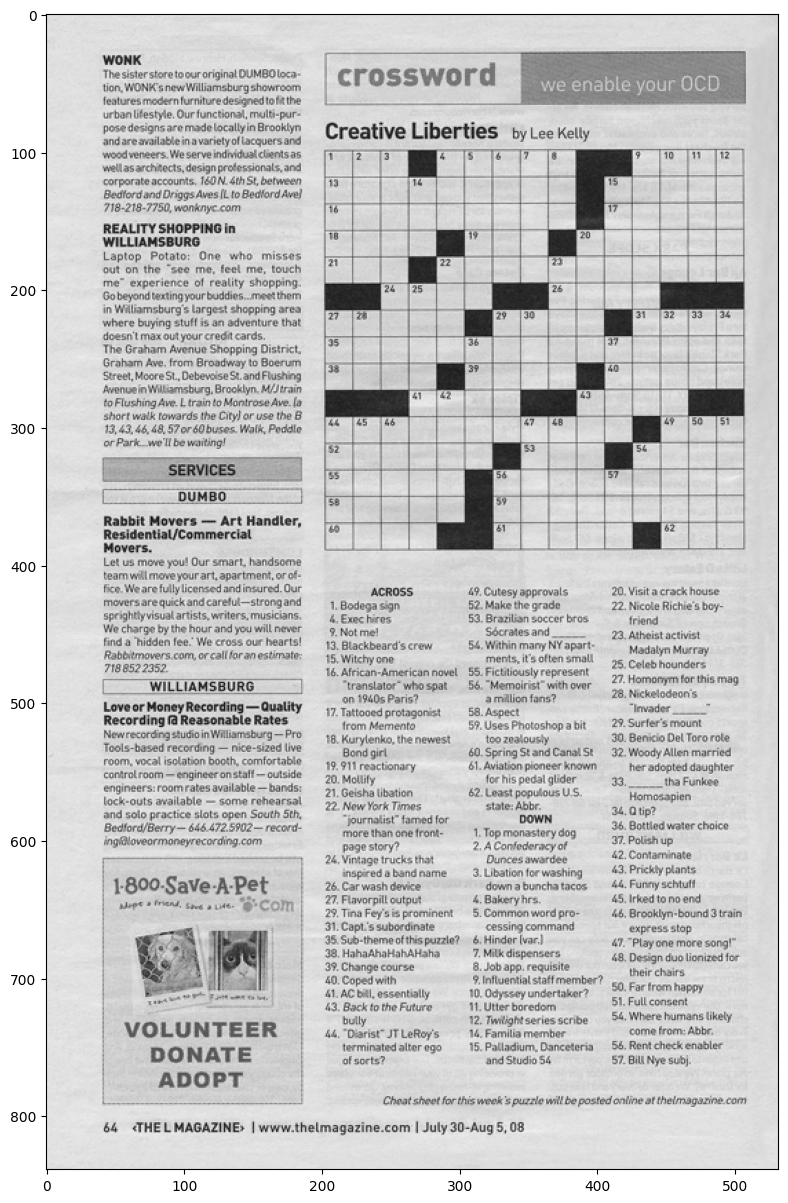

In [30]:
show_pic(img)

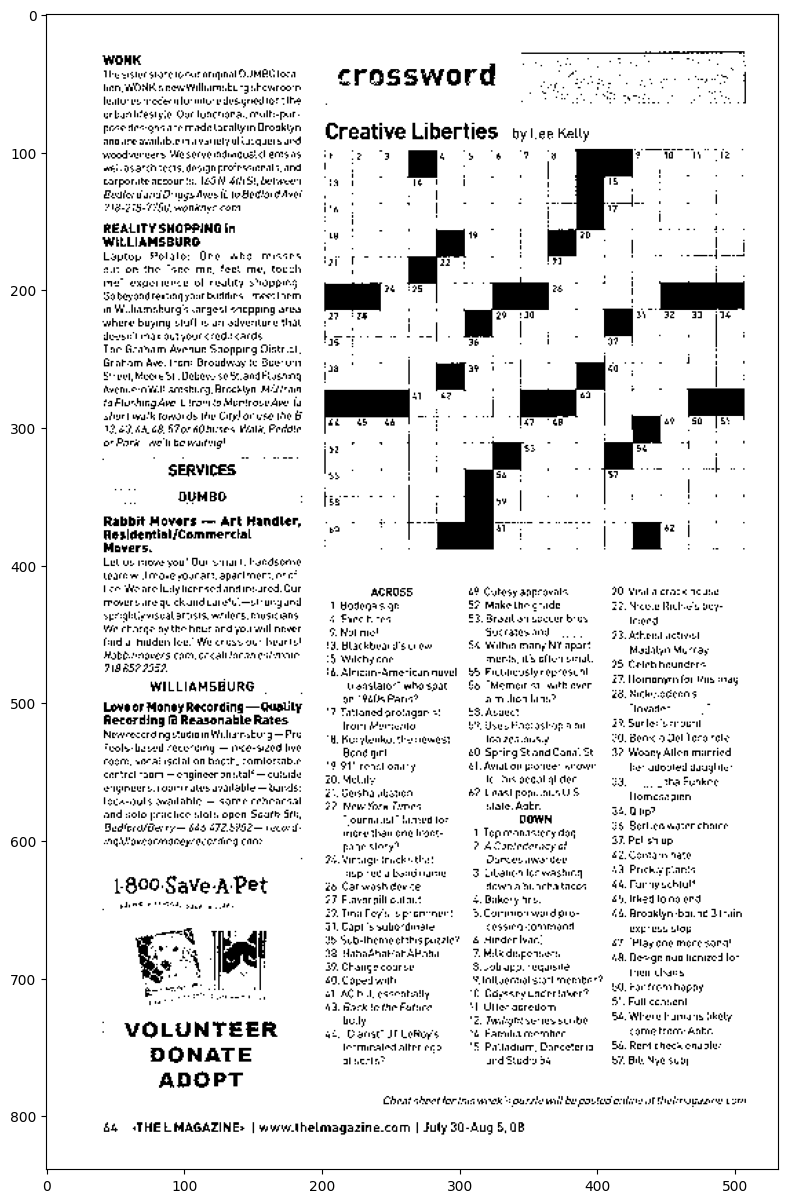

In [31]:
ret, th1 = cv2.threshold(img, 127,255,cv2.THRESH_BINARY)
show_pic(th1)

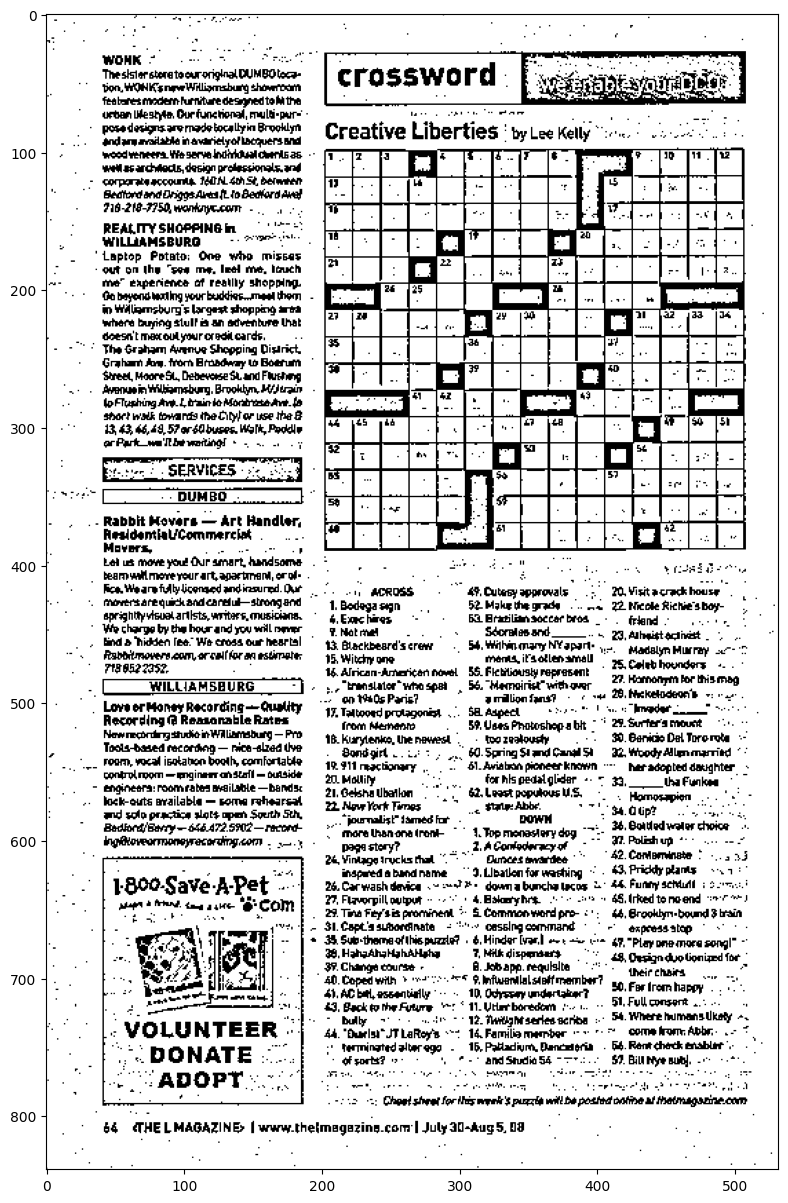

In [32]:
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
show_pic(th2)

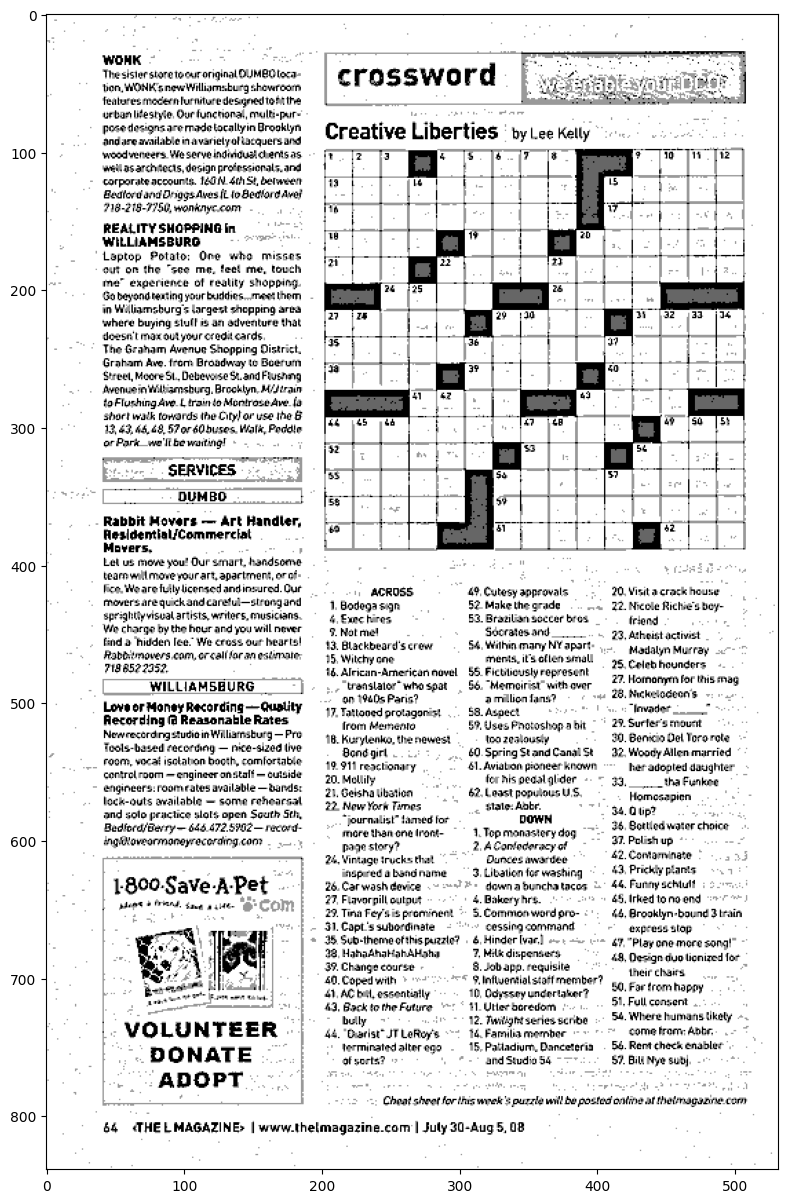

In [33]:
blended = cv2.addWeighted(src1=th1, alpha=0.6, src2=th2, beta=0.4, gamma=0)
show_pic(blended)

# Blurring and Smoothing

Smoothing an image can help get rid of noise! Often, blurring or smoothing is combined with edge detection. Blurring helps edge detection algorithms to avoid detecting too many edges in high resolution images.